# **Calories Burnt Prediction**

**Dataset Link:-** https://www.kaggle.com/code/pragathiputhran/calories-burnt-prediction/data

This project aims to predict the number of calories a person burns during exercise based on their physiological data and workout details.

**Steps followed:**
1. Data pre-processing & EDA
2. Feature Engineering
3. Model trainning & Evaluation

In [205]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from warnings import filterwarnings
filterwarnings("ignore")

sns.set()

# Data pre-processing & EDA
1. Loading of 2 different csv files - `calories.csv` & `exercise.csv` using Pandas
2. Checking null values
3. Concatenating both the DataFrame into a single DataFrame.
4. Dropped `user_id` as it's just an identifier with no predictive value.

In [206]:
#Load the Calories dataset
df1 = pd.read_csv("calories.csv")
df1.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [207]:
df1.shape

(15000, 2)

In [208]:
#Load the Exercise Dataset
df2 = pd.read_csv("exercise.csv")
df2.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [209]:
df2.shape

(15000, 8)

**Concatenating both the Dataframe i.e df1 and df2**

In [210]:
df1 = df1.set_index('User_ID')
df2 = df2.set_index('User_ID')
df = pd.concat([df2, df1[['Calories']]], axis=1)
df = df.reset_index()

In [211]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [213]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [214]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [215]:
# drop User_ID column because it is only used for identification

df.drop(columns = ["User_ID"],axis=1,inplace =True)

In [216]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


# Feature Engineering
1. Separated Categorical column `Gender` and Numerical Features.
2. Plotted the `Gender` column to visualize the number of male and female.
3. Performed one-hot encoding in `Gender` column. This gives `male = True` & `female = False`.
4. Visualized the distribution & co-relation of numerical features.
5. Checking if there is any `outlier` in the data.
6. Fetaure scaling
7. Splitting of data in `train` & `test` split in `80%` & `20%` repectively

**Categorical Feature identification and visualization**

In [116]:
#Fatching Categorical Data
cat_col=[col for col in df.columns if df[col].dtype=='O'] #-->Object-"o" (means object)
cat_col

['Gender']

In [218]:
df["Gender"].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

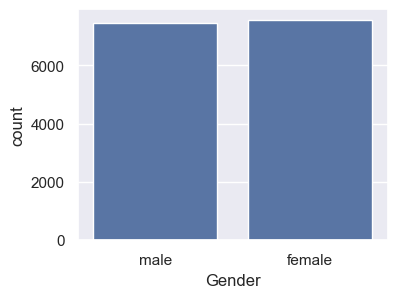

In [219]:
# plotting the gender column in count plot
plt.figure(figsize = (4,3))
sns.countplot(x=df['Gender'])
plt.show()

In [119]:
categorical = df[cat_col]
categorical.head()

,Gender
0,male
1,female
2,male
3,female
4,female


**One-hot Encoding**

In [120]:
pd.get_dummies(df["Gender"],drop_first=True)

,male
0,True
1,False
2,True
3,False
4,False
...,...
14995,False
14996,False
14997,False
14998,True


In [121]:
# one-hot encoding
categorical = pd.get_dummies(categorical["Gender"],drop_first=True)
categorical

,male
0,True
1,False
2,True
3,False
4,False
...,...
14995,False
14996,False
14997,False
14998,True


**Numerical Features distribution and scaling**

In [122]:
Num_col = [col for col in df.columns if df[col].dtype != "O"]
Num_col

['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']

In [123]:
df[Num_col].shape

(15000, 7)

In [124]:
Numerical = df[Num_col]
Numerical.head() 

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,69,179.0,79.0,5.0,88.0,38.7,26.0
3,34,179.0,71.0,13.0,100.0,40.5,71.0
4,27,154.0,58.0,10.0,81.0,39.8,35.0


In [125]:
Numerical.shape

(15000, 7)

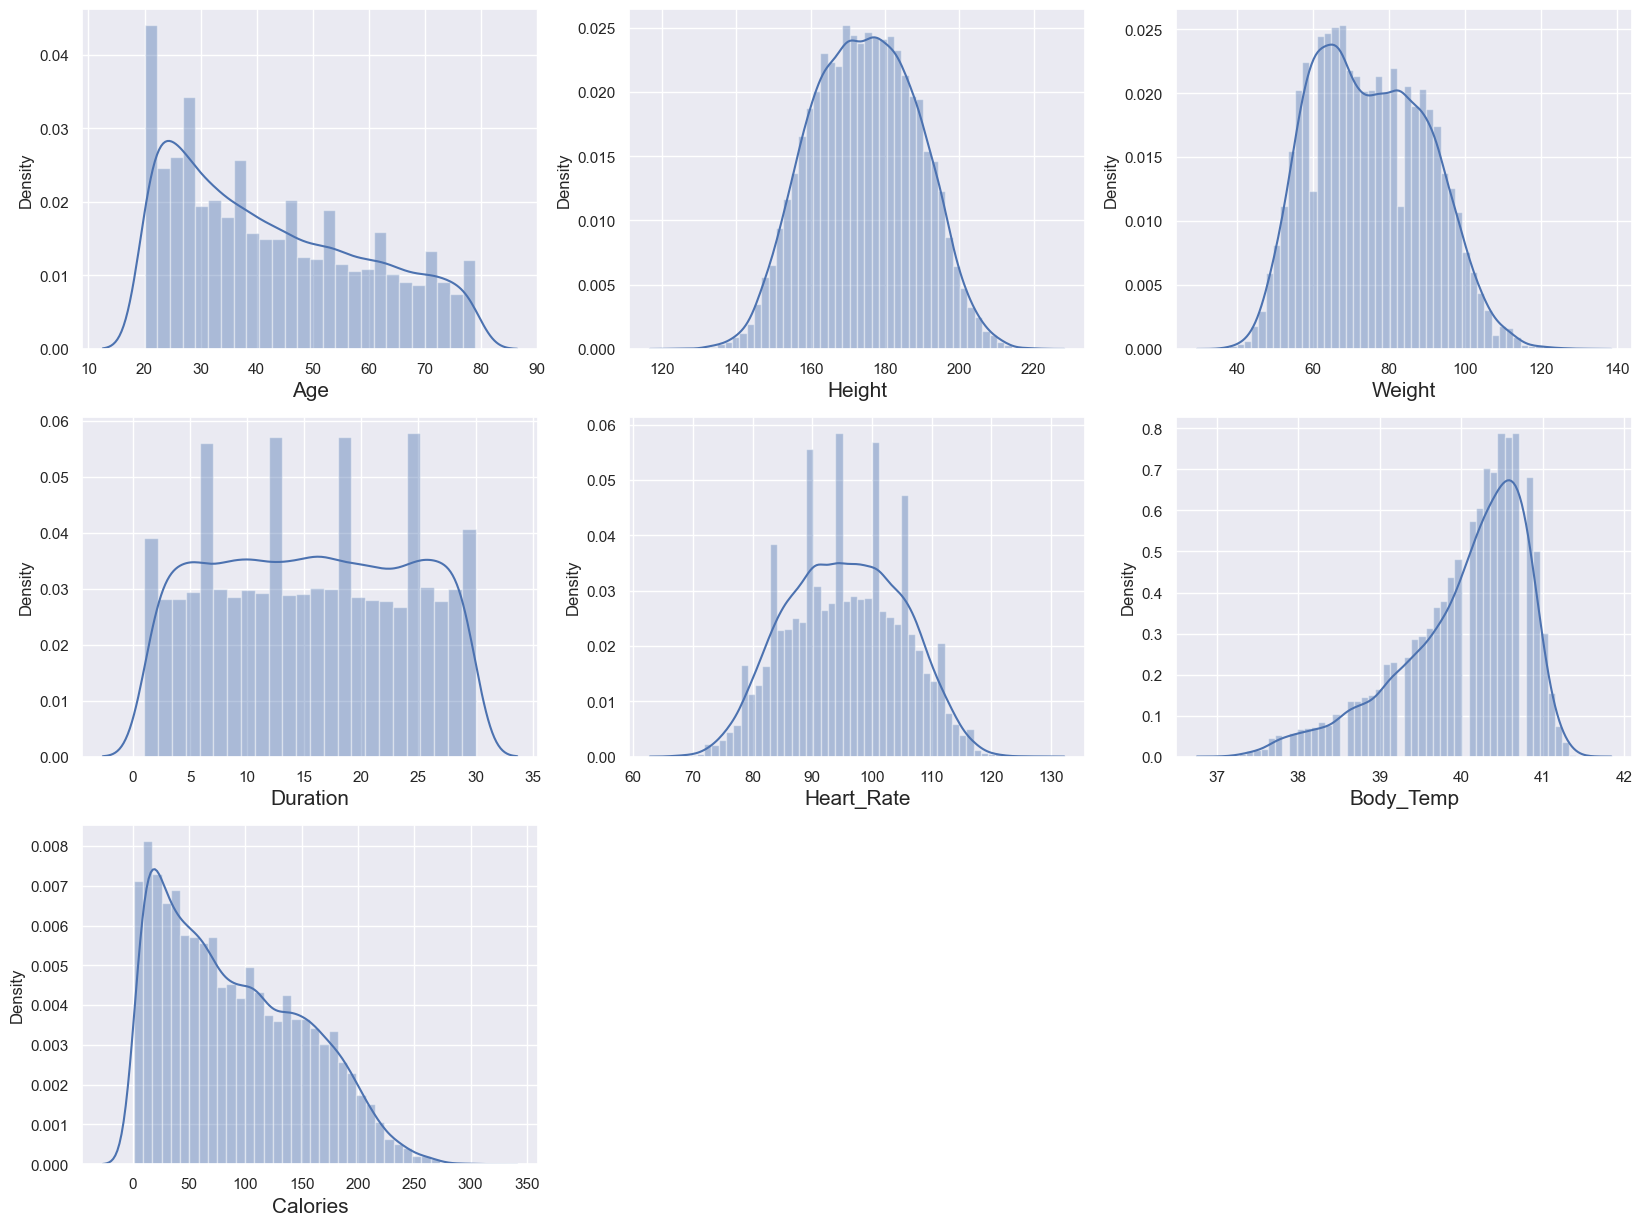

In [220]:
plt.figure(figsize=(20,15))
plotnumber = 1

for column in Numerical:
  if plotnumber <= 8:
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(Numerical[column])
    plt.xlabel(column,fontsize=15)
  plotnumber+=1
plt.show()

<Axes: >

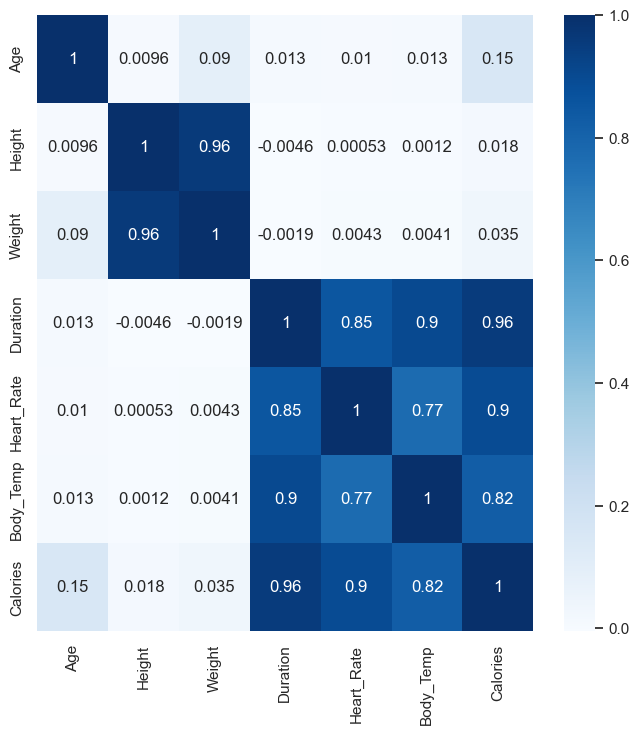

In [127]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(8,8))
sns.heatmap(Numerical.corr(), cmap='Blues',annot = True)

### **Concatenate Categorical and Numerical**

In [128]:
data = pd.concat([categorical,Numerical],axis=1)

In [129]:
data.head()

,male,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,True,68,190.0,94.0,29.0,105.0,40.8,231.0
1,False,20,166.0,60.0,14.0,94.0,40.3,66.0
2,True,69,179.0,79.0,5.0,88.0,38.7,26.0
3,False,34,179.0,71.0,13.0,100.0,40.5,71.0
4,False,27,154.0,58.0,10.0,81.0,39.8,35.0


<Axes: >

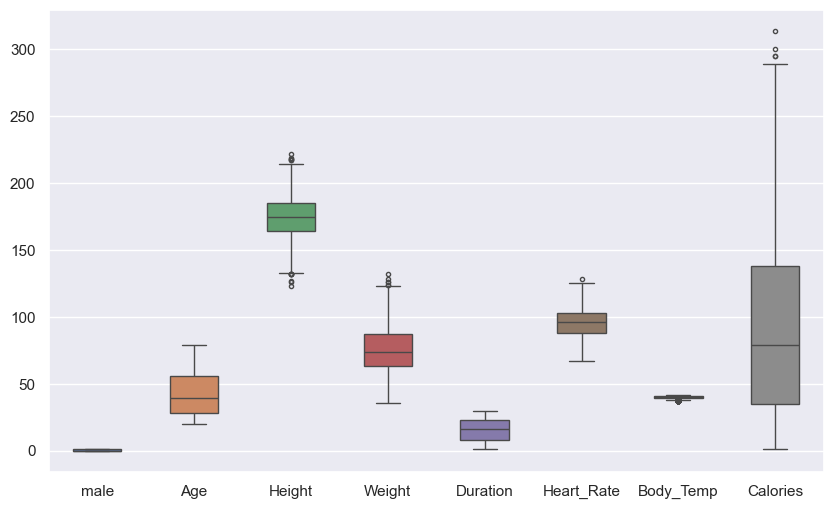

In [130]:
fig,ax = plt.subplots(figsize = (10,6))
sns.boxplot(data=data,width = 0.5,fliersize = 3,ax=ax)

In [131]:
data.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


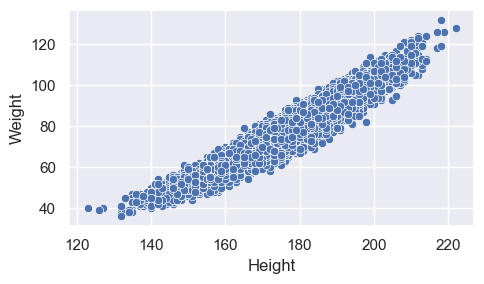

In [132]:
# To see if any of the weights or heights are outlier
plt.figure(figsize = (5,3))
sns.scatterplot(x='Height', y='Weight', data=data) 

plt.tight_layout()
plt.show()

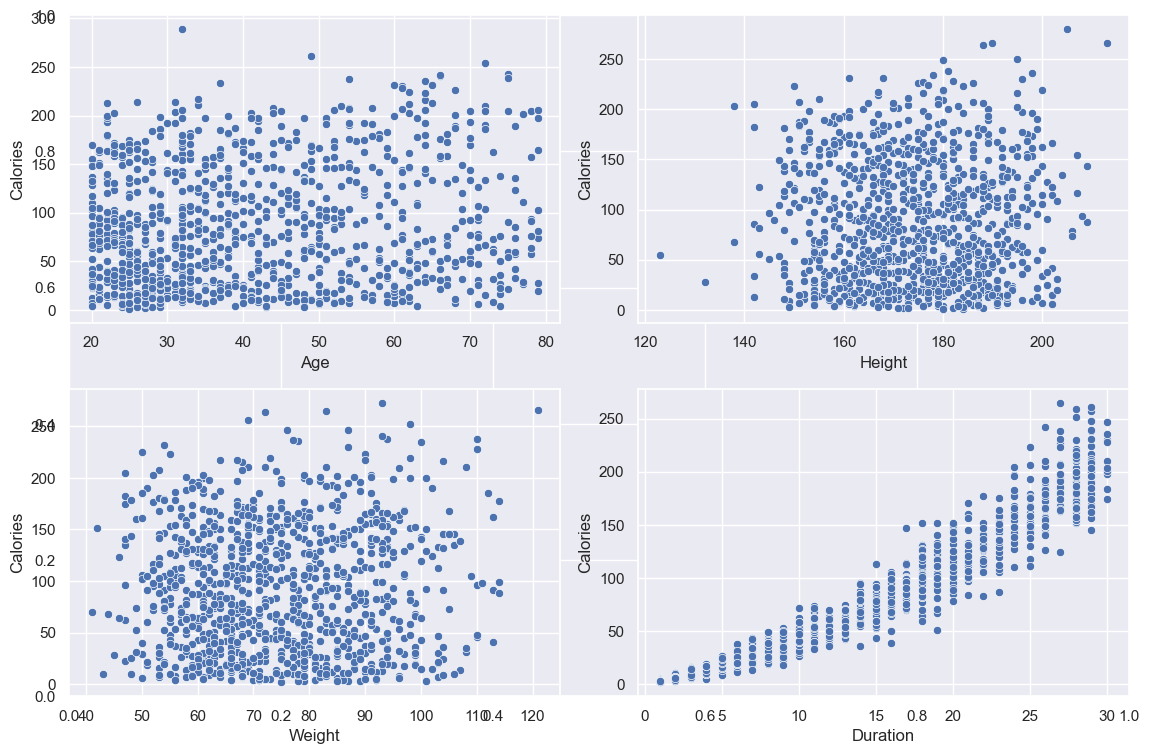

In [150]:
# Checking if there is any relation between the numerical features
features = ['Age', 'Height', 'Weight', 'Duration']

plt.subplots(figsize=(12, 8))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sample_data = data.sample(1000)
    sns.scatterplot(x=col, y='Calories', data=sample_data)
plt.tight_layout()
plt.show()

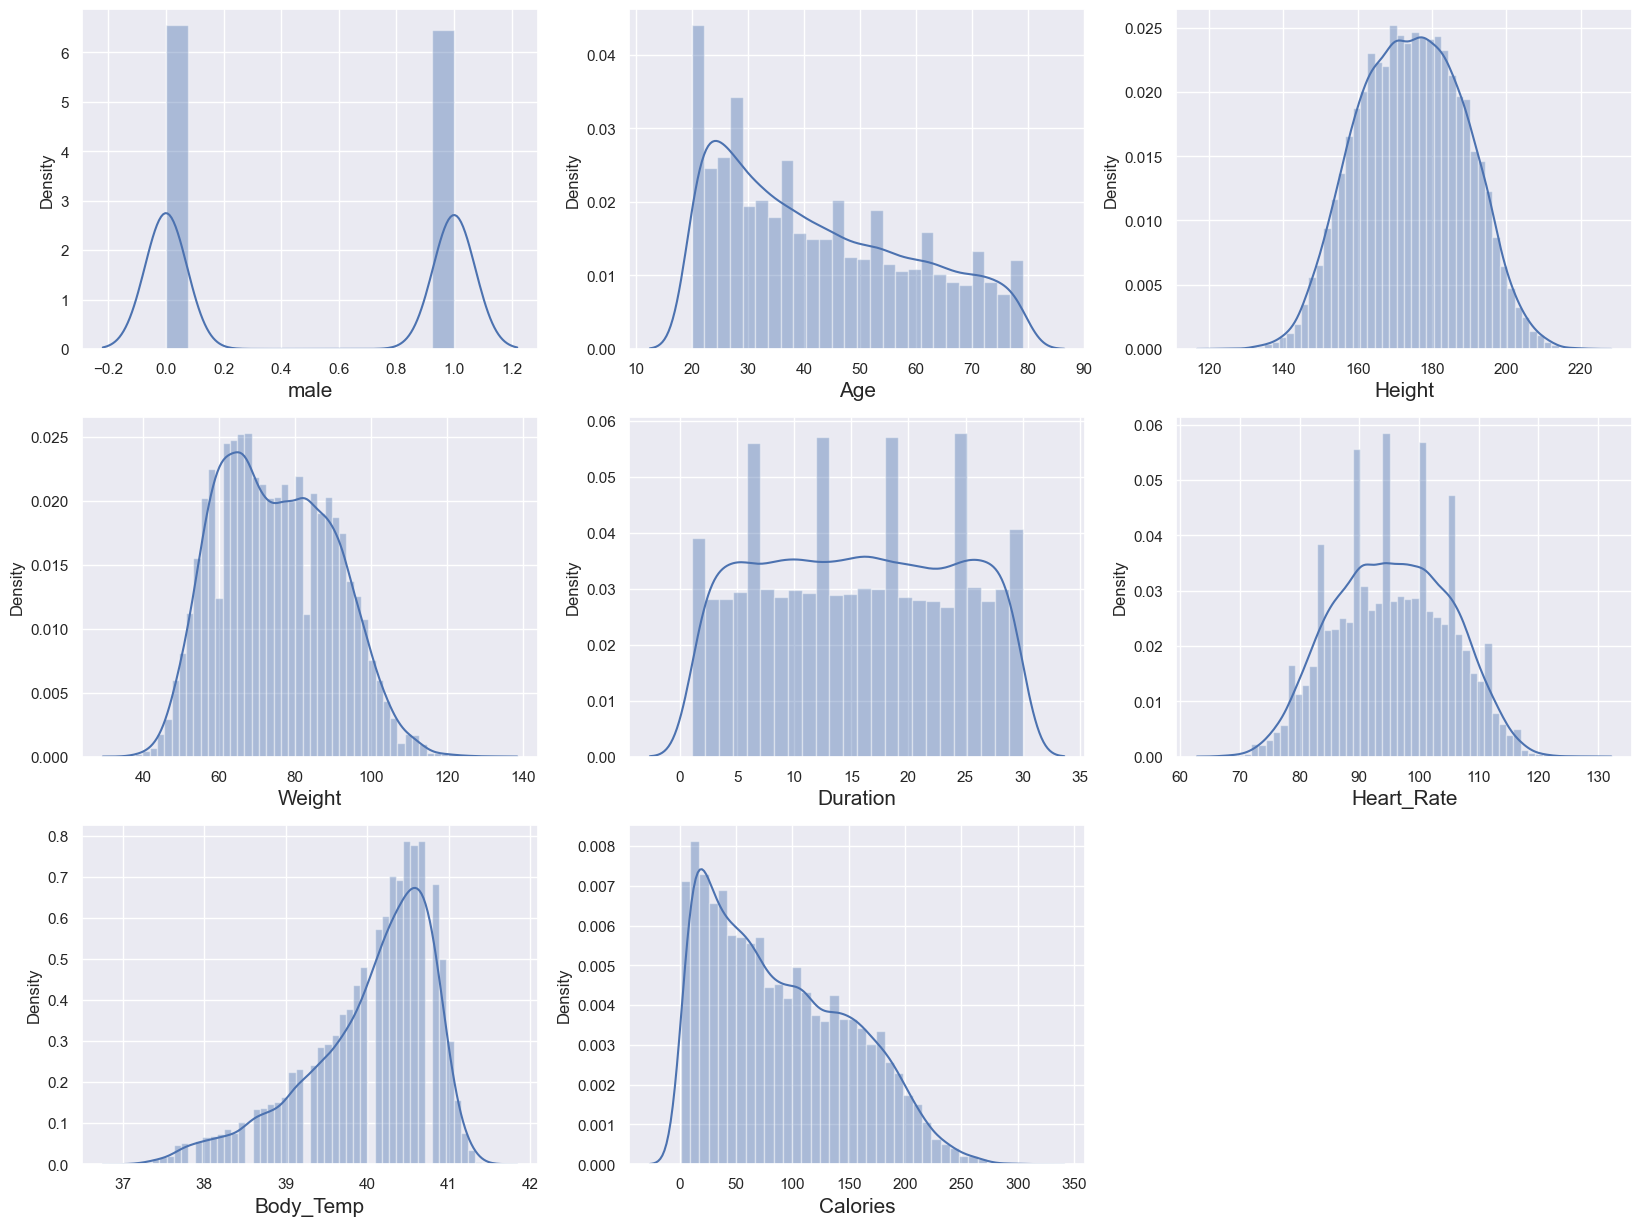

In [151]:
# distribution of all the features
plt.figure(figsize=(20,15))
plotnumber = 1

for column in data:
  if plotnumber <= 8:
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize=15)
  plotnumber+=1
plt.show()

In [135]:
data.columns

Index(['male', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [136]:
X_1 = data.drop(columns = ["Calories"],axis = 1)
y = data["Calories"]

In [137]:
X_1.head()

,male,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,True,68,190.0,94.0,29.0,105.0,40.8
1,False,20,166.0,60.0,14.0,94.0,40.3
2,True,69,179.0,79.0,5.0,88.0,38.7
3,False,34,179.0,71.0,13.0,100.0,40.5
4,False,27,154.0,58.0,10.0,81.0,39.8


In [138]:
y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

#### **Feature Scaling**

In [153]:
# Feature Scaling - MinMax Scaling is done
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(X_1)

X = pd.DataFrame(scaled, columns=X_1.columns)

In [140]:
X.head()

,male,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1.0,0.813559,0.676768,0.604167,0.965517,0.622951,0.840909
1,0.0,0.000000,0.434343,0.250000,0.448276,0.442623,0.727273
2,1.0,0.830508,0.565657,0.447917,0.137931,0.344262,0.363636
3,0.0,0.237288,0.565657,0.364583,0.413793,0.540984,0.772727
4,0.0,0.118644,0.313131,0.229167,0.310345,0.229508,0.613636


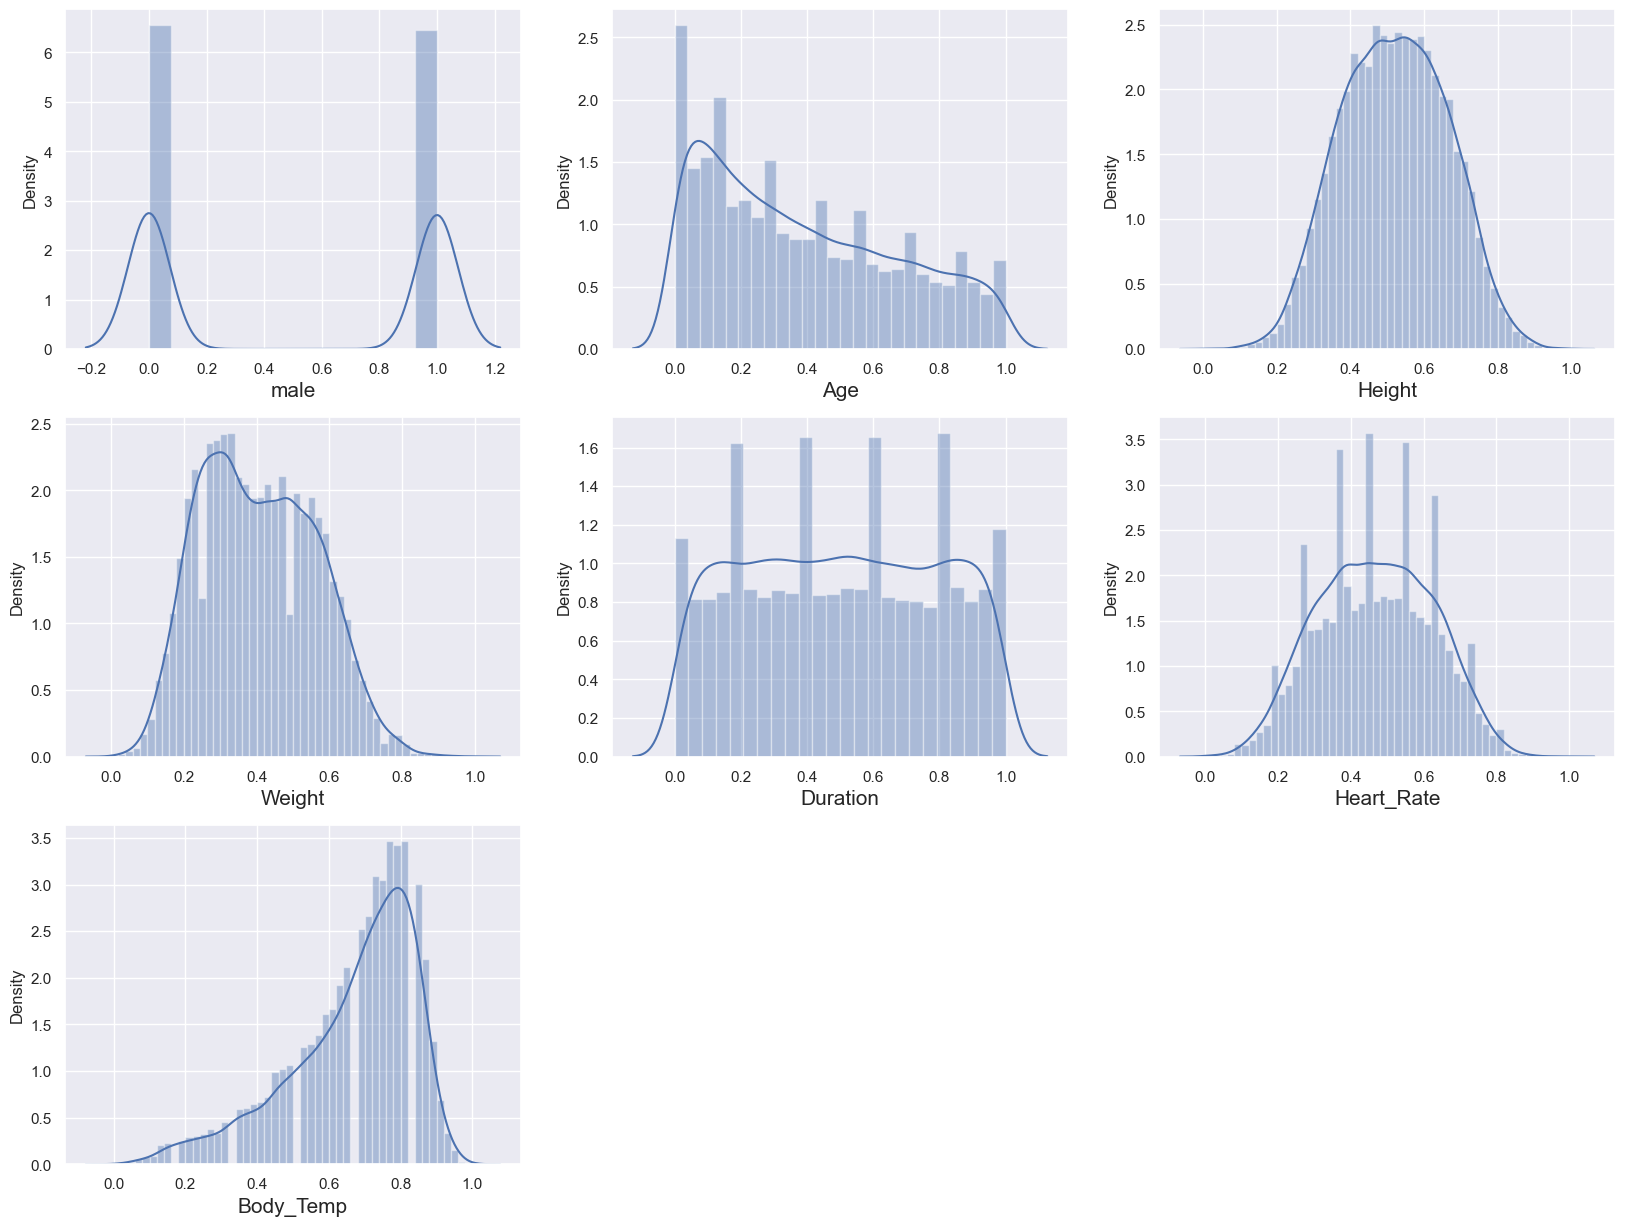

In [141]:
# distribution of all the features after scaling
plt.figure(figsize=(20,15))
plotnumber = 1

for column in X:
  if plotnumber <= 8:
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(X[column])
    plt.xlabel(column,fontsize=15)
  plotnumber+=1
plt.show()

### Splitting the data into test-train split in 80-20.

In [154]:
# Split the Data -- 80% for testing & 20% trainning

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

In [160]:
print("Shape of X Train: ",X_train.shape)
print("Shape of X Test: ",X_test.shape)
print('-'*30)
print("Shape of y Train: ",y_train.shape)
print("Shape of y Test: ",y_test.shape)

Shape of X Train:  (12000, 7)
Shape of X Test:  (3000, 7)
------------------------------
Shape of y Train:  (12000,)
Shape of y Test:  (3000,)


# Model evaluations and predictions

In [156]:
#from sklearn import metrics for model evaluation
from sklearn import metrics

def predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    
    y_prediction=model.predict(X_test)
    print('predictions are: {}'.format(y_prediction))
    print('\n')

    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    
    return model

**Linear Regression**

In [145]:
from sklearn.linear_model import LinearRegression
Linear_regression = predict(LinearRegression())

predictions are: [198.81182363  80.43555305 194.40940033 ...  22.14745631 118.63504926
 -11.98134672]


r2 score: 0.9655977245826503
RMSE: 11.75262039353817


**DecisionTree Regression**

In [146]:
from sklearn.tree import DecisionTreeRegressor
Decision_Tree_Regressor = predict(DecisionTreeRegressor())

predictions are: [194.  75. 206. ...  30. 109.  14.]


r2 score: 0.9924446914416569
RMSE: 5.507661330667794


**RandomForest Regression**

In [147]:
from sklearn.ensemble import RandomForestRegressor
Random_Forest_Regressor = predict(RandomForestRegressor())

predictions are: [197.59  66.82 196.66 ...  27.83 111.1   14.27]


r2 score: 0.9976795582893544
RMSE: 3.052294655937835


**XGBoost Regressor**

In [148]:
from xgboost import XGBRegressor
XGB_regression = predict(XGBRegressor())

predictions are: [197.06581   70.867226 196.99498  ...  29.043041 104.09284   14.61472 ]


r2 score: 0.9986863132331905
RMSE: 2.2966088664340956


# Predicting the output

In [221]:
print("Enter the following details to predict calories burnt:")
print('_'*60)

# Get input from the user
gender_input = input("1. Gender (male/female): ").lower()
age = int(input("2. Age (in years): "))
height = float(input("3. Height (in cm): "))
weight = float(input("4. Weight (in kg): "))
duration = float(input("5. Duration of exercise (in minutes): "))
heart_rate = float(input("6. Heart Rate (bpm): "))
body_temp = float(input("7. Body Temperature (in Celsius): "))

# Process the gender input
is_male = True if gender_input == 'male' else False

# Create a DataFrame from the inputs in the correct order
input_data = pd.DataFrame([[is_male, age, height, weight, duration, heart_rate, body_temp]],
                          columns=X_1.columns)

# Scale the input data using the existing scaler
input_data_scaled = scaler.transform(input_data)

# Predict using the already trained XGBoost model
predicted_calories = XGB_regression.predict(input_data_scaled)

# Display the prediction
print("\n" + "="*40)
print('Using XGBoost Regression')
print(f"Predicted Calories Burnt: {predicted_calories[0]:.2f} calories")
print("="*40)

Enter the following details to predict calories burnt:
____________________________________________________________


1. Gender (male/female):  male
2. Age (in years):  35
3. Height (in cm):  167
4. Weight (in kg):  67
5. Duration of exercise (in minutes):  49
6. Heart Rate (bpm):  80
7. Body Temperature (in Celsius):  38



Using XGBoost Regression
Predicted Calories Burnt: 126.40 calories
